In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow-gpu==2.0.0-rc1   

     |████████████████████████████████| 380.5MB 46kB/s 
     |████████████████████████████████| 501kB 46.5MB/s 
     |████████████████████████████████| 4.3MB 54.4MB/s 


In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models

import numpy as np
import matplotlib.pyplot as plt 
tf.__version__

'2.0.0-rc1'

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
model = tf.keras.models.load_model('/content/gdrive/My Drive/model/lre5ep300.h5')

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 112, 112, 64)      256   

In [0]:
model.compile(
    optimizers= 'Adadelta',
    loss='binary_crossentropy', 
    metrics=['acc']
)

In [0]:
import cv2
TEST_PATH = '/content/gdrive/My Drive/dataset/test/cat/cat.0.jpg'
img = cv2.imread(TEST_PATH)
img = cv2.resize(img, (IMAGE_WIDTH,IMAGE_HEIGHT))
x = img.copy()
x.astype(np.float32)
x = x / 255.0

In [0]:
#title 기본 제목 텍스트
# 모델 output, name 가져오기
def Layers_predict(model, image):
    output_layers = [layer.output for layer in model.layers[:] if layer.name[:4] =='conv']
    output_names = [layer.name for layer in model.layers[:] if layer.name[:4] =='conv']
    new_model = tf.keras.models.Model(inputs = model.input, outputs = output_layers)
    new_model_pred = new_model.predict(np.expand_dims(image, axis=0))
    print(len(new_model_pred))
    return new_model_pred, output_names

In [0]:
# model의 모든 레이어 featuremap visualization
def show_predict_image(show_model_pred,output_names,index):
    n_col= 16
    _,_, size, n_features = show_model_pred.shape
    n_row = n_features //n_col
    feature_map_image = np.zeros(shape=(size*n_row,size*n_col),dtype=('uint8'))
    for row in range(n_row):
        for col in range(n_col):   
            input_fmi = show_model_pred[0,:,:,row*n_col+col]

            input_fmi -= input_fmi.mean()
            input_fmi /= input_fmi.std()
            input_fmi *= 64
            input_fmi += 128
            input_fmi = np.clip(input_fmi, 0, 255).astype('uint8')

            feature_map_image[row*size:(row+1)*size, col*size:(col+1)*size] = input_fmi

    plt.figure(figsize=(n_col, n_row))
    plt.xticks([])
    plt.yticks([])
    plt.title(' layer {} : {}'.format(index+1, output_names[index]))
    plt.tight_layout()
    plt.imshow(feature_map_image,cmap='viridis')  
        

In [0]:
#model의 모든 레이어 16개 filter만 featuremap visualization
def show_predict_image_line(show_model_pred,output_names,index):
    n_col= 16
    _,_, size, n_features = show_model_pred.shape
    feature_map_image = np.zeros(shape=(size,size*n_col),dtype=('uint8'))
    for col in range(n_col):   
        input_fmi = show_model_pred[0,:,:,col]

        input_fmi -= input_fmi.mean()
        input_fmi /= input_fmi.std()
        input_fmi *= 64
        input_fmi += 128
        input_fmi = np.clip(input_fmi, 0, 255).astype('uint8')

        feature_map_image[0:size, col*size:(col+1)*size] = input_fmi

    plt.figure(figsize=(16, 10))
    plt.xticks([])
    plt.yticks([])
    plt.title(' layer {} : {}'.format(index+1, output_names[index]))
    plt.tight_layout()
    plt.imshow(feature_map_image,cmap='viridis')  

In [0]:
show_model_pred, output_names = Layers_predict(model, x)

13


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


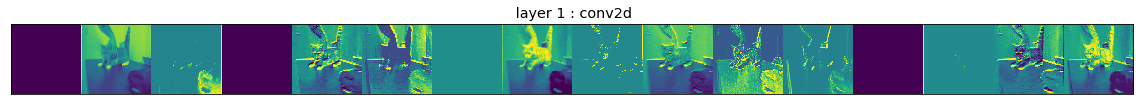

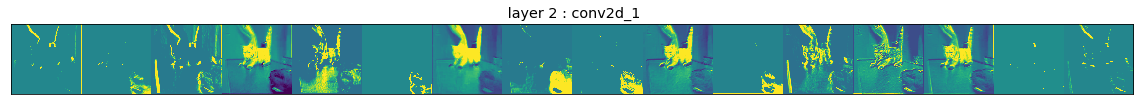

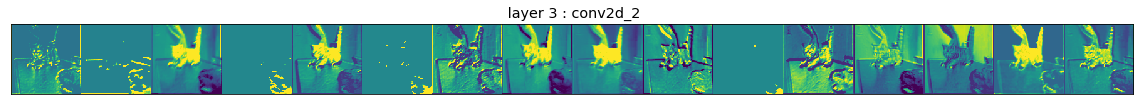

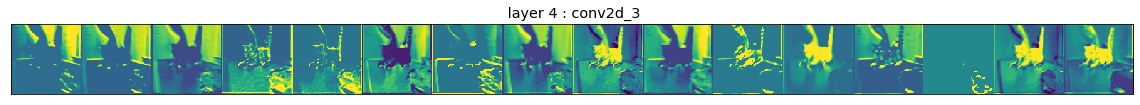

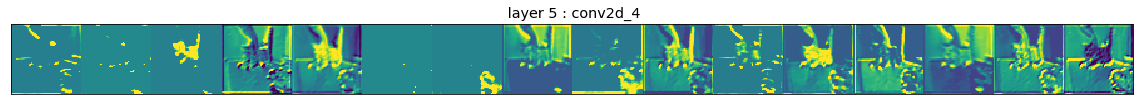

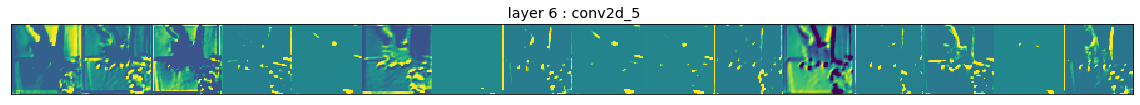

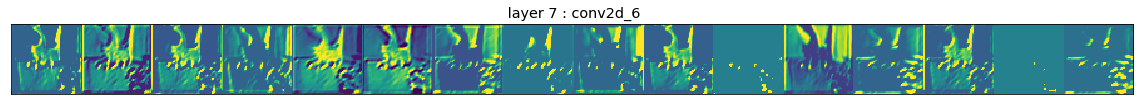

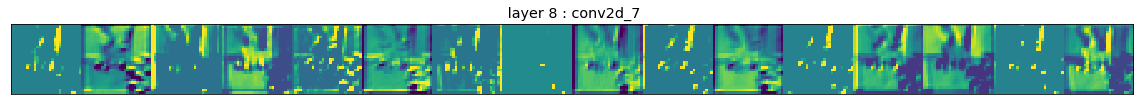

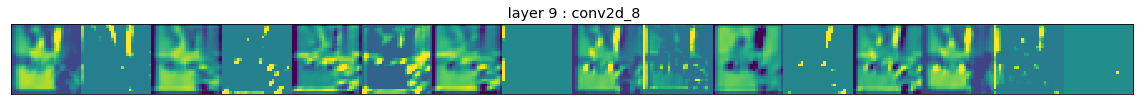

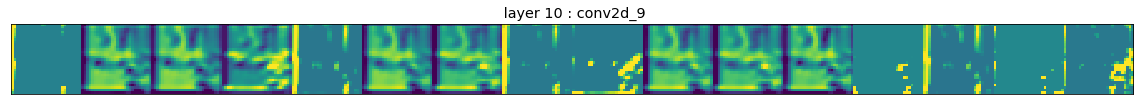

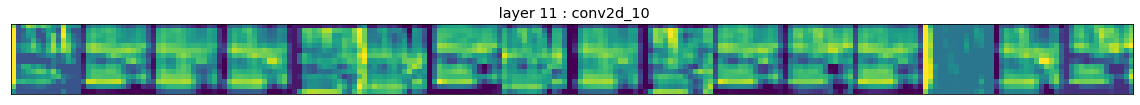

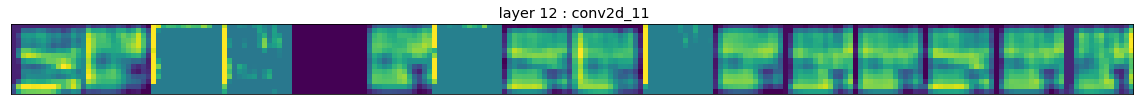

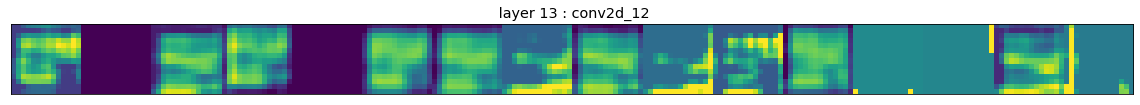

In [0]:
for i in range(0,13):
    show_predict_image_line(show_model_pred[i], output_names,i)

In [0]:
for i in range(0,13):
    show_predict_image(show_model_pred[i], output_names,i)

Output hidden; open in https://colab.research.google.com to view.